# INSURANCE AMOUNT PREDICTION

Author : ADITYA NARAYAN S               
Date   : 05-05-2022             
Class  : I MSc  
Roll no: 21226

In [48]:
library(tidyverse)
library(moments)
library(GGally)
library(ggplot2)
library( corrplot)
library(gridExtra)
library(caret)
library(factoextra)
library(leaps)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [27]:
getwd()

[1] "/home/msc1/21229/MDSC206_RLab/project"

In [28]:
insurance_dataset <- read_csv("insurance_num.csv")

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): age, sex, bmi, children, smoker, region, expenses

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
head(insurance_dataset)

age,sex,bmi,children,smoker,region,expenses
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19,1,27.9,0,1,4,16884.92
18,0,33.8,1,0,4,1725.55
28,0,33.0,3,0,4,4449.46
33,0,22.7,0,0,2,21984.47
32,0,28.9,0,0,2,3866.86
31,1,25.7,0,0,4,3756.62


In [30]:
names(insurance_dataset)

[1] "age"      "sex"      "bmi"      "children" "smoker"   "region"   "expenses"

In [31]:
str(insurance_dataset)

spec_tbl_df [1,338 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:1338] 19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : num [1:1338] 1 0 0 0 0 1 1 1 0 1 ...
 $ bmi     : num [1:1338] 27.9 33.8 33 22.7 28.9 25.7 33.4 27.7 29.8 25.8 ...
 $ children: num [1:1338] 0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : num [1:1338] 1 0 0 0 0 0 0 0 0 0 ...
 $ region  : num [1:1338] 4 4 4 2 2 4 4 2 1 2 ...
 $ expenses: num [1:1338] 16885 1726 4449 21984 3867 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_double(),
  ..   bmi = col_double(),
  ..   children = col_double(),
  ..   smoker = col_double(),
  ..   region = col_double(),
  ..   expenses = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


The data has 1338 instances with 7 attributes. All 7 are integer type.

In [32]:
is.null(insurance_dataset)

[1] FALSE

There are no null values in any of the column

In [33]:
summary(insurance_dataset)

      age             sex              bmi           children    
 Min.   :18.00   Min.   :0.0000   Min.   :16.00   Min.   :0.000  
 1st Qu.:27.00   1st Qu.:0.0000   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Median :0.0000   Median :30.40   Median :1.000  
 Mean   :39.21   Mean   :0.4948   Mean   :30.67   Mean   :1.095  
 3rd Qu.:51.00   3rd Qu.:1.0000   3rd Qu.:34.70   3rd Qu.:2.000  
 Max.   :64.00   Max.   :1.0000   Max.   :53.10   Max.   :5.000  
     smoker           region         expenses    
 Min.   :0.0000   Min.   :1.000   Min.   : 1122  
 1st Qu.:0.0000   1st Qu.:2.000   1st Qu.: 4740  
 Median :0.0000   Median :4.000   Median : 9382  
 Mean   :0.2048   Mean   :2.788   Mean   :13270  
 3rd Qu.:0.0000   3rd Qu.:4.000   3rd Qu.:16640  
 Max.   :1.0000   Max.   :4.000   Max.   :63770  

. Data looks legit as all the statistics seem reasonable

. Looking at the age column, data looks representative of the true age distribution of the adult population

. Very few people have more than 2 children. 75% of the people have 2 or less children

. The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

# EXPLORATORY DATA ANALYSIS

### CORRELATION PLOT

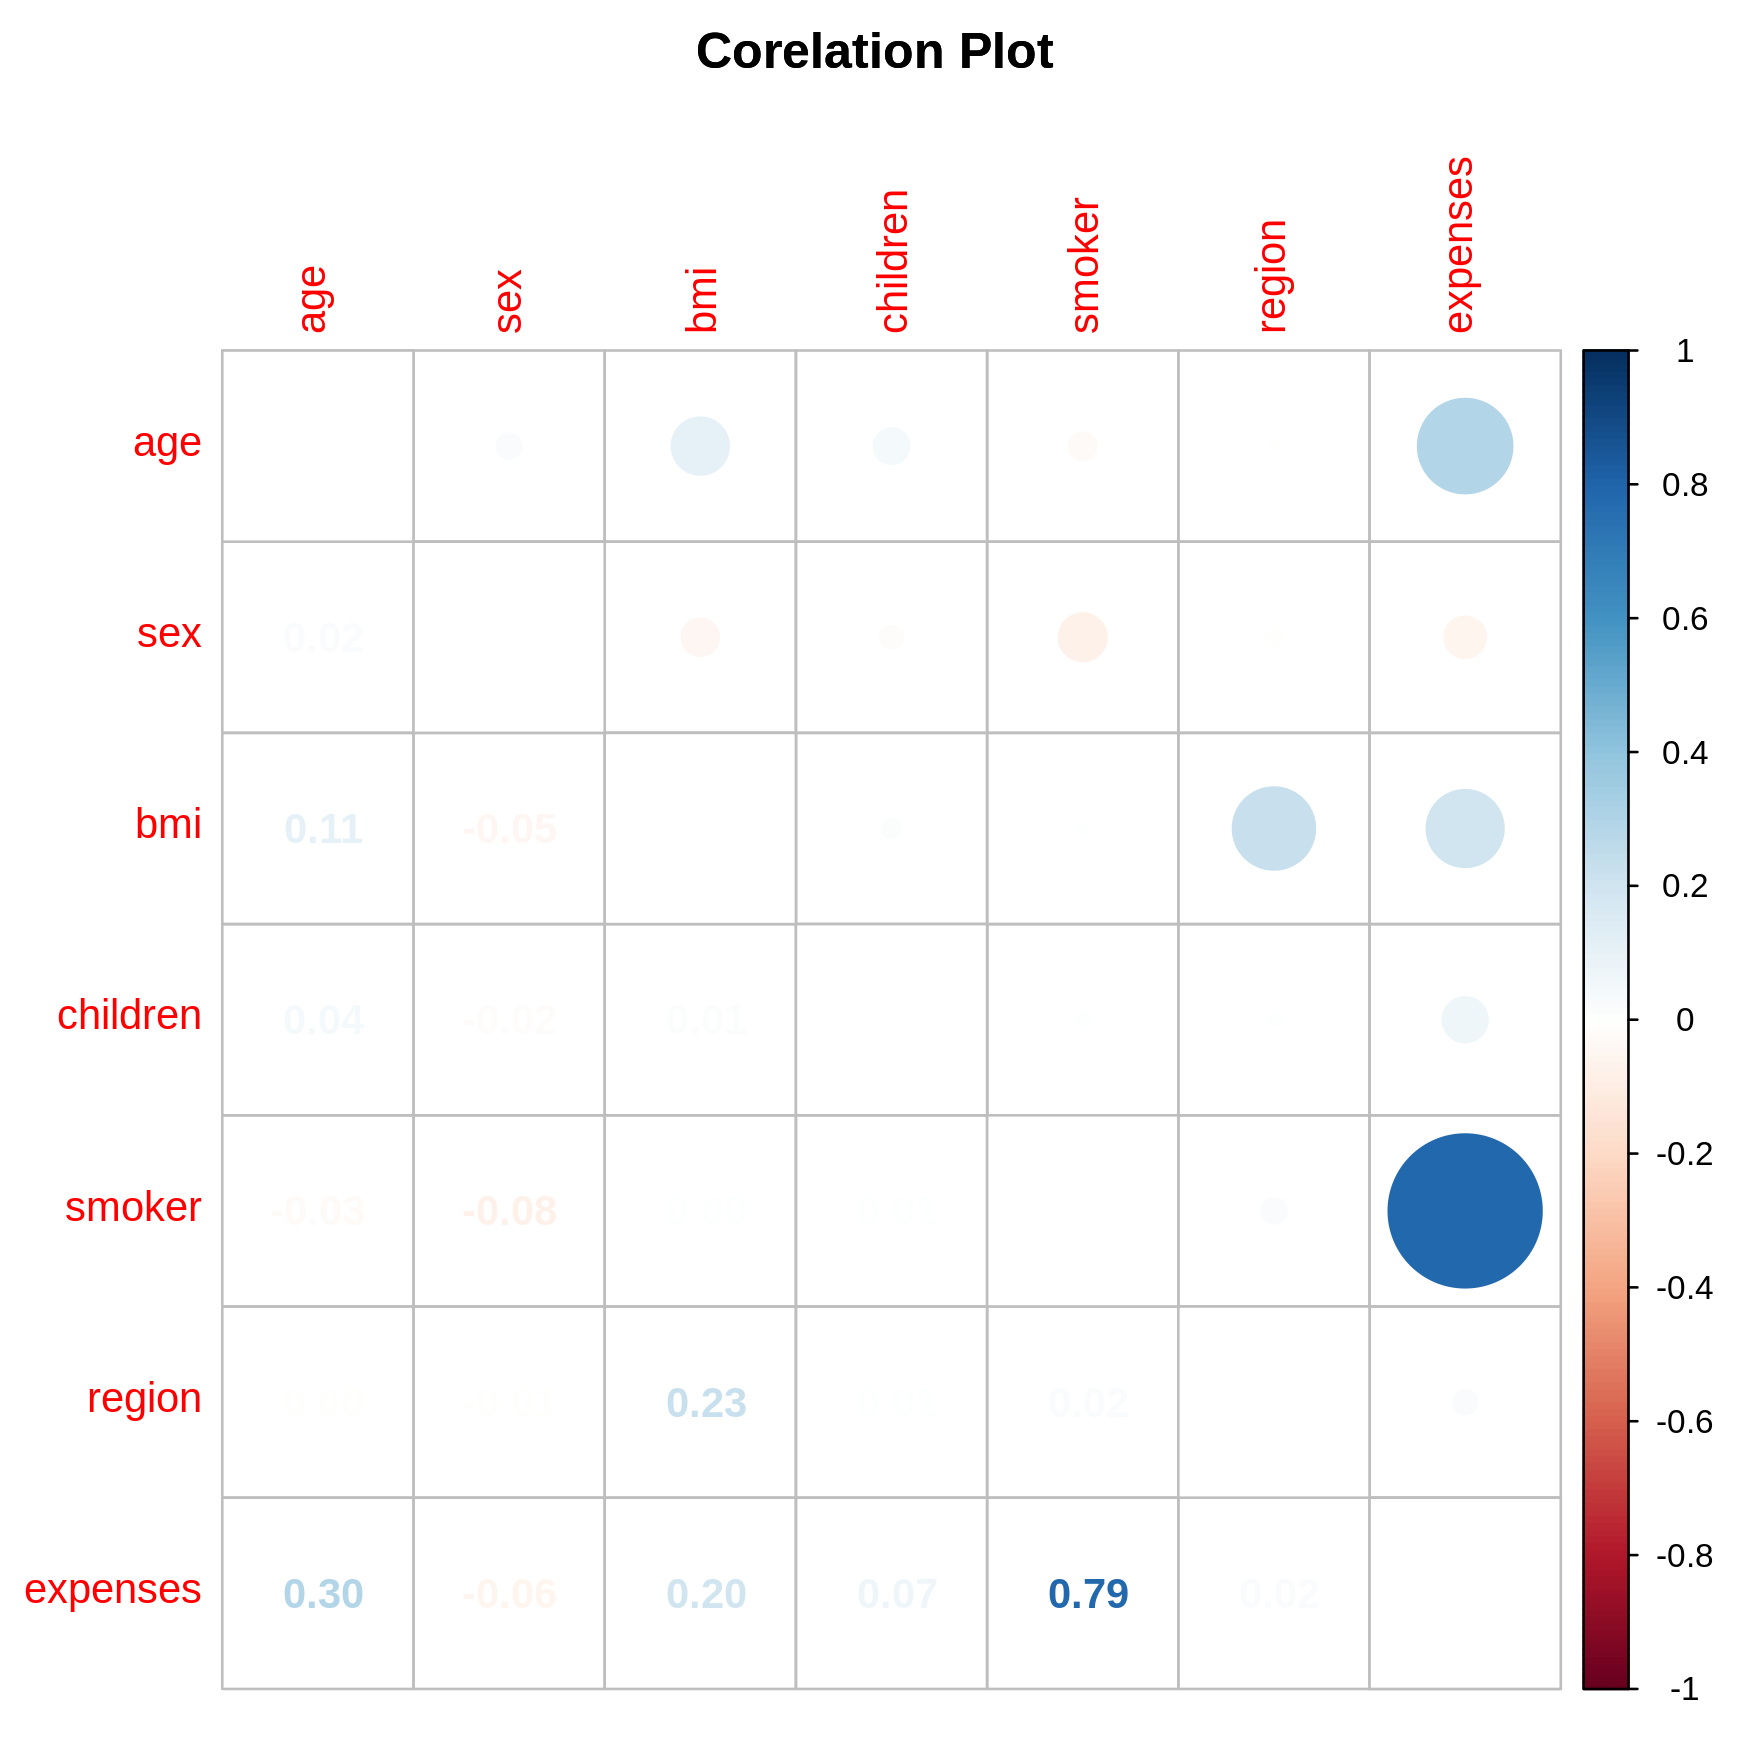

In [34]:
options(repr.plot.height=7, repr.plot.res=250)

corrplot.mixed(cor(insurance_dataset),
lower="number",
upper="circle",
tl.pos = "lt",
title="Corelation Plot",
mar=c(0,0,2,0))

#### PAIR PLOT

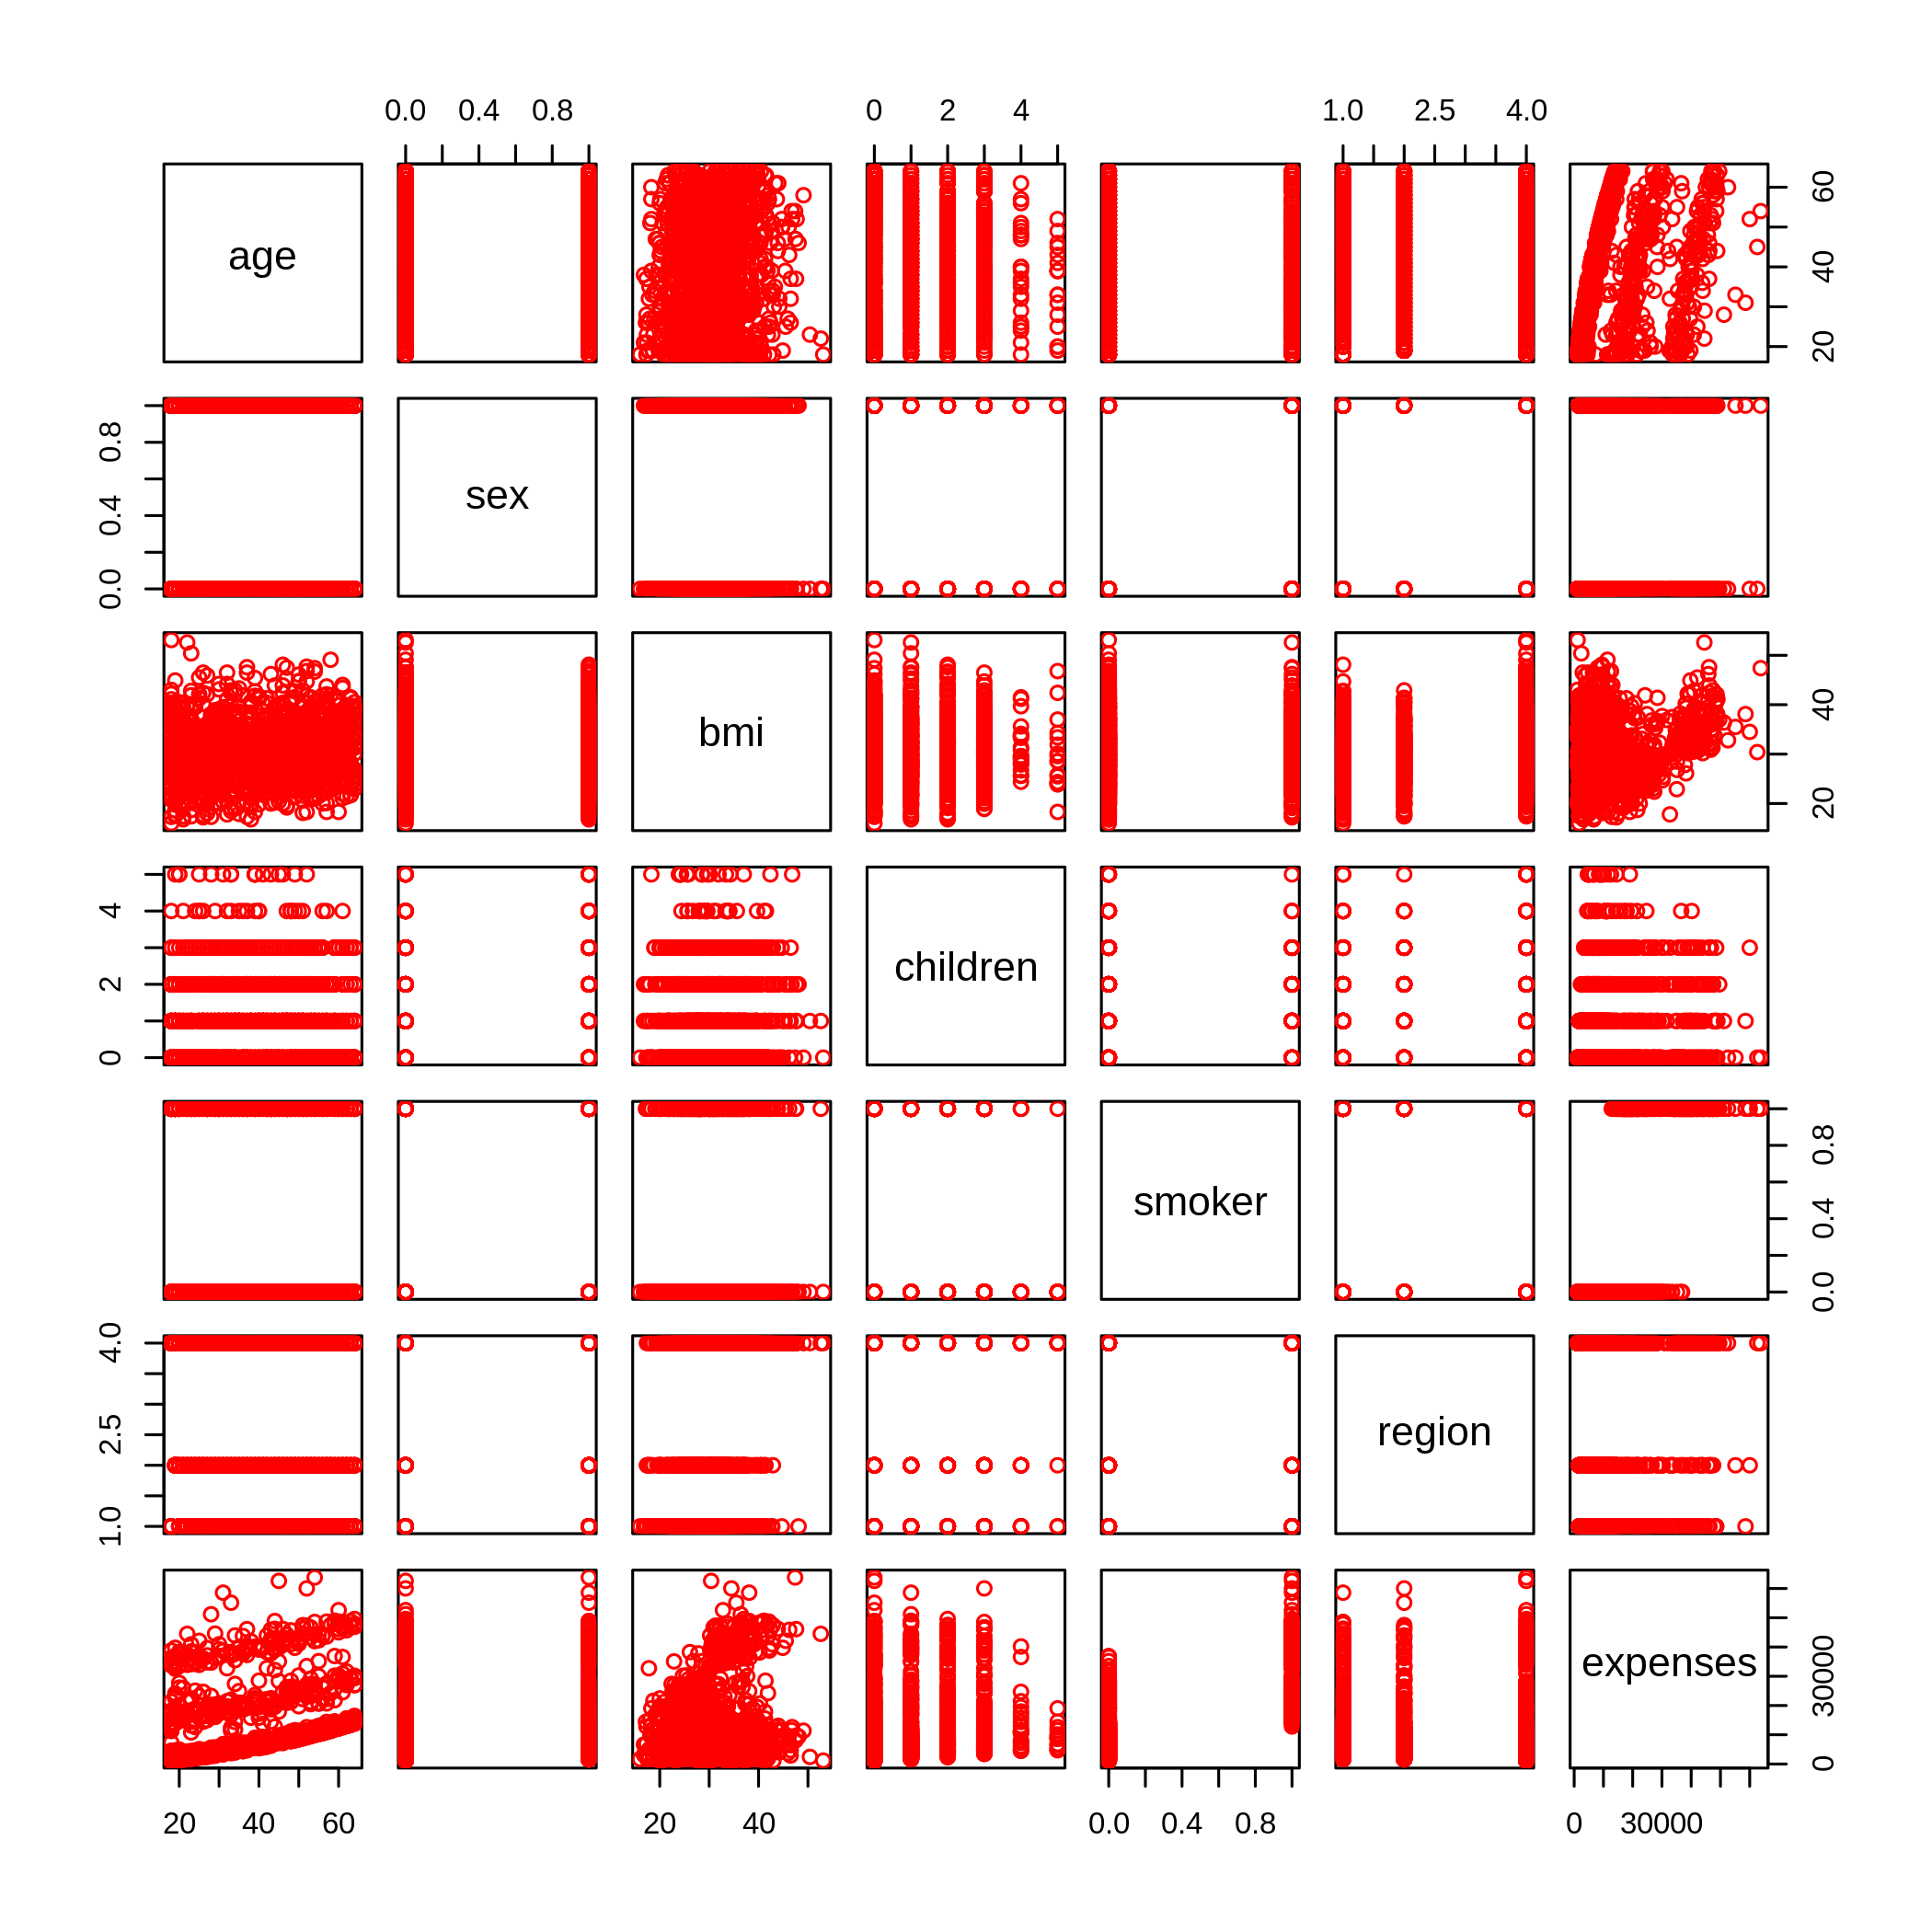

In [35]:
options(repr.plot.height=7, repr.plot.res=300)
pairs(insurance_dataset, col = 'red')

### BARPLOT

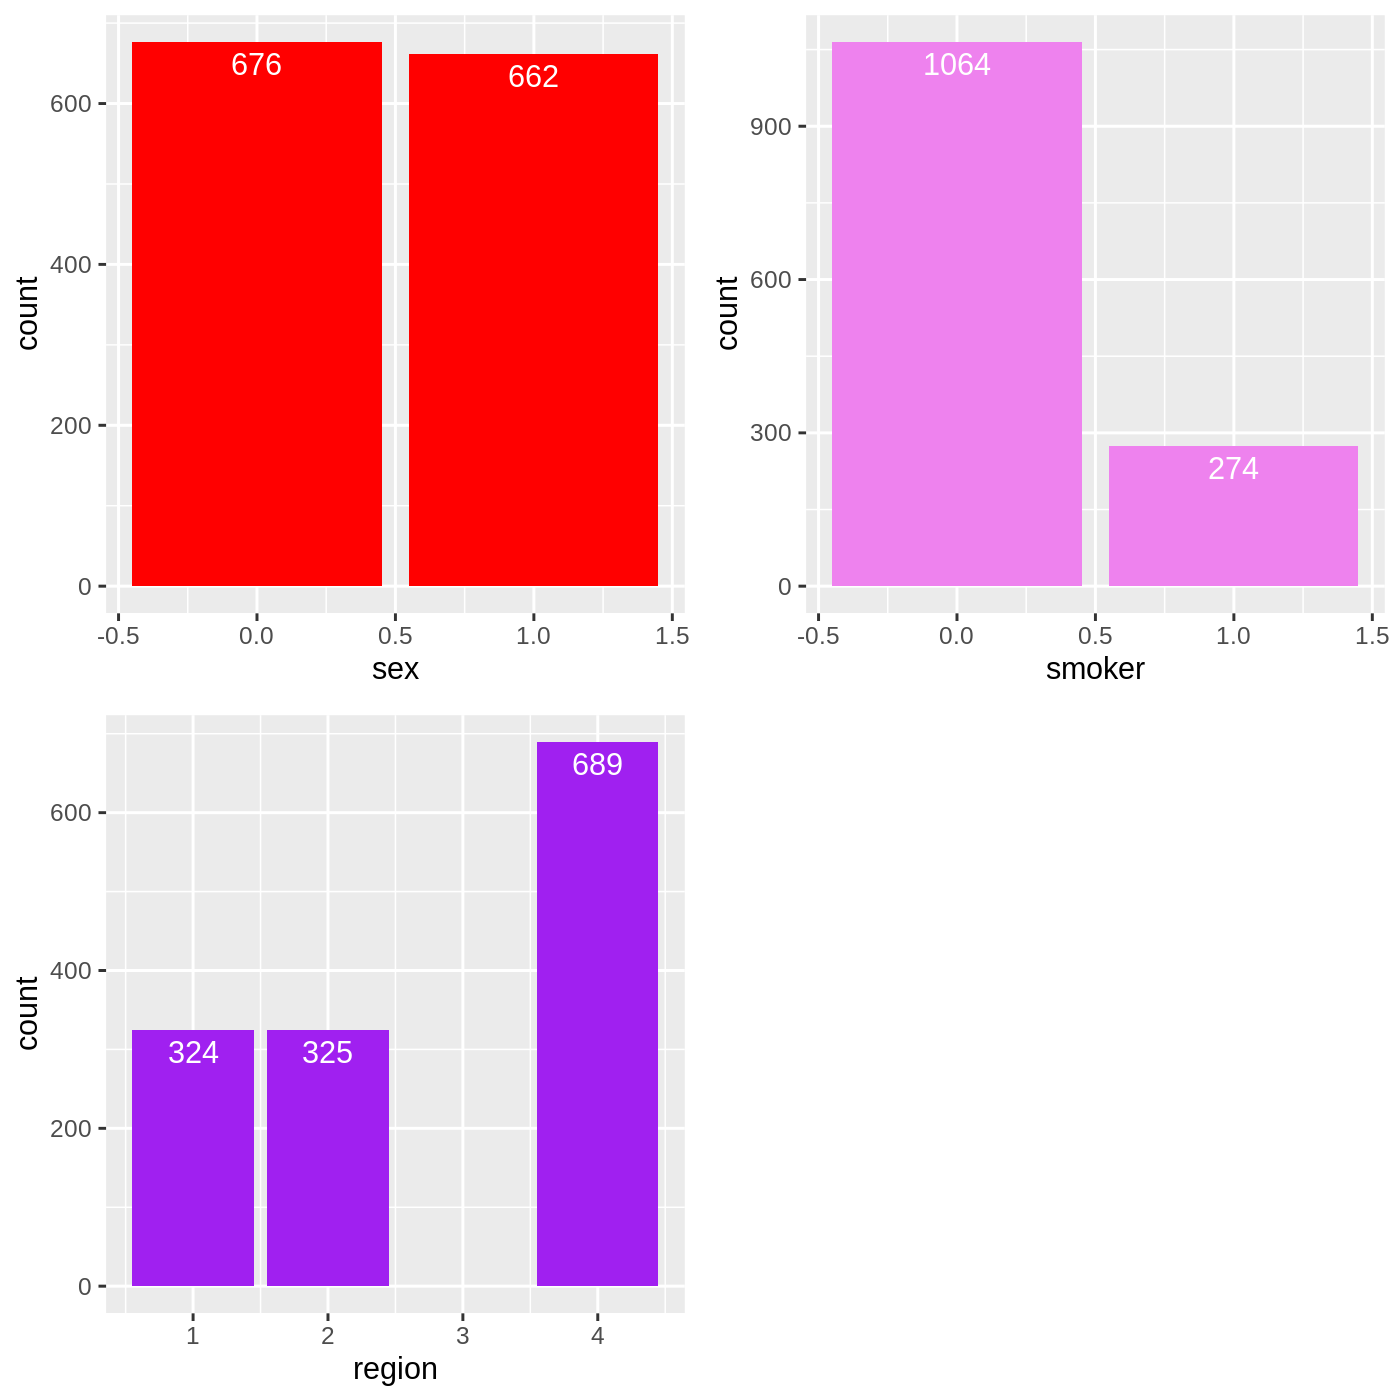

In [36]:
options(repr.plot.height=7, repr.plot.res=200)

#       0 = MALE, 1 = FEMALE
plot1 = ggplot(insurance_dataset, aes(x = sex)) +
geom_bar(fill= "red") +
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white")

#       0 = NON-SMOKER, 1 = SMOKER
plot2= ggplot(insurance_dataset, aes(x = smoker)) +
geom_bar(fill= "violet") +
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white")

#       1 = NE, 2 = NW , 3 = SW , 4= SE 
plot3= ggplot(insurance_dataset, aes(x = region)) +
geom_bar(fill= "purple") +
geom_text(aes(label = ..count..), stat = "count", vjust = 1.5, colour = "white")

grid.arrange(plot1, plot2, plot3,ncol =2)

### HISTOGRAM WITH DENSITY CURVE

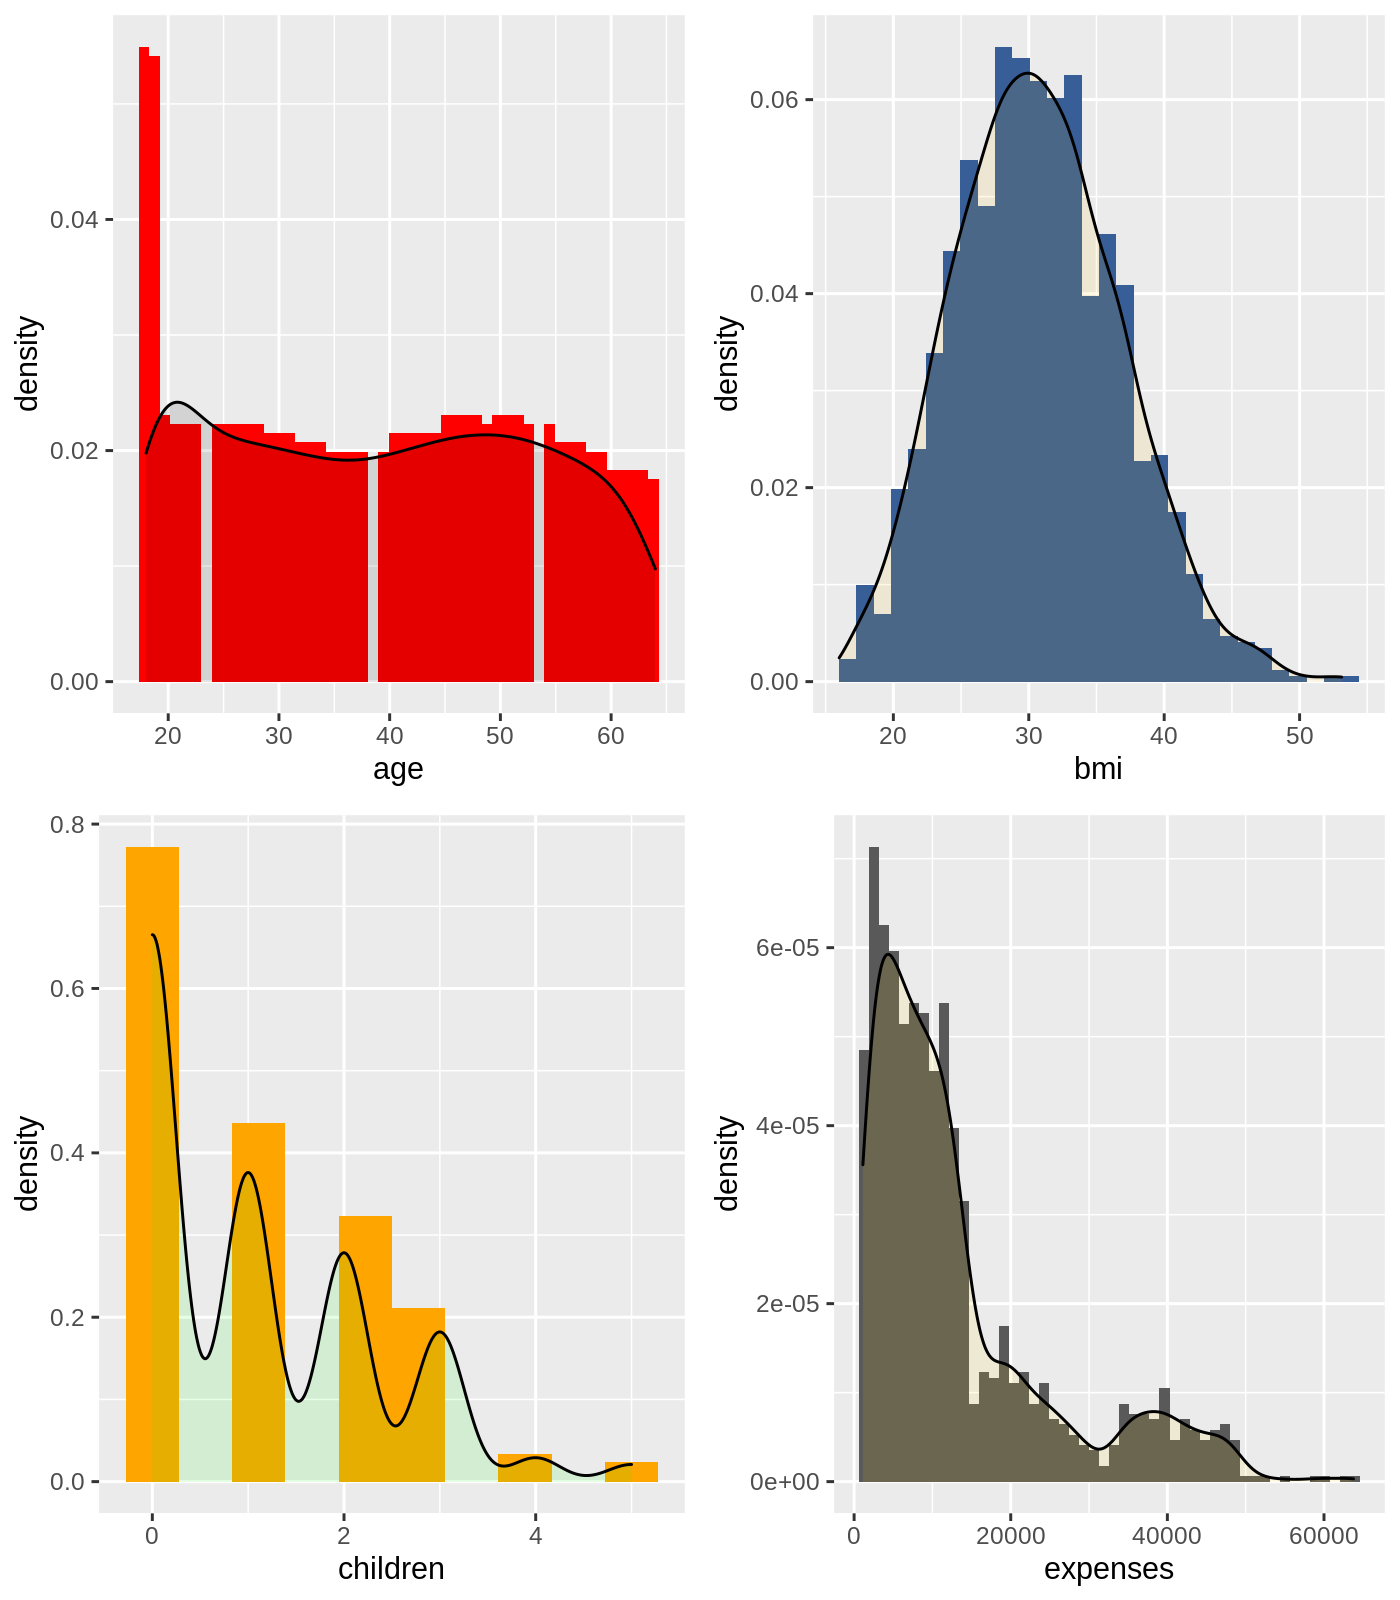

In [37]:
par(mfrow=c(2,2))

options(repr.plot.height=8, repr.plot.res=200)
#age
plot1= ggplot(data = insurance_dataset,aes(x = age))+
geom_histogram(aes(y = ..density..),bins= 50, fill = "red")+ 
geom_density( alpha = 0.1, fill = "black")

#bmi
plot2= ggplot(data = insurance_dataset,aes(x = bmi))+
geom_histogram(aes(y = ..density..),bins= 30, fill = "#375E97")+ 
geom_density( alpha = 0.1, fill = "#FFBB00")

#children
plot3= ggplot(data = insurance_dataset,aes(x = children))+
geom_histogram(aes(y = ..density..),bins= 10, fill = "orange")+ 
geom_density( alpha = 0.1, fill = "green")

#expenses
plot4= ggplot(data = insurance_dataset,aes(x = expenses))+
geom_histogram(aes(y = ..density..),bins= 50)+ 
geom_density( alpha = 0.1, fill = "gold")

grid.arrange(plot1, plot2, plot3, plot4, ncol =2)

### BOXPLOT

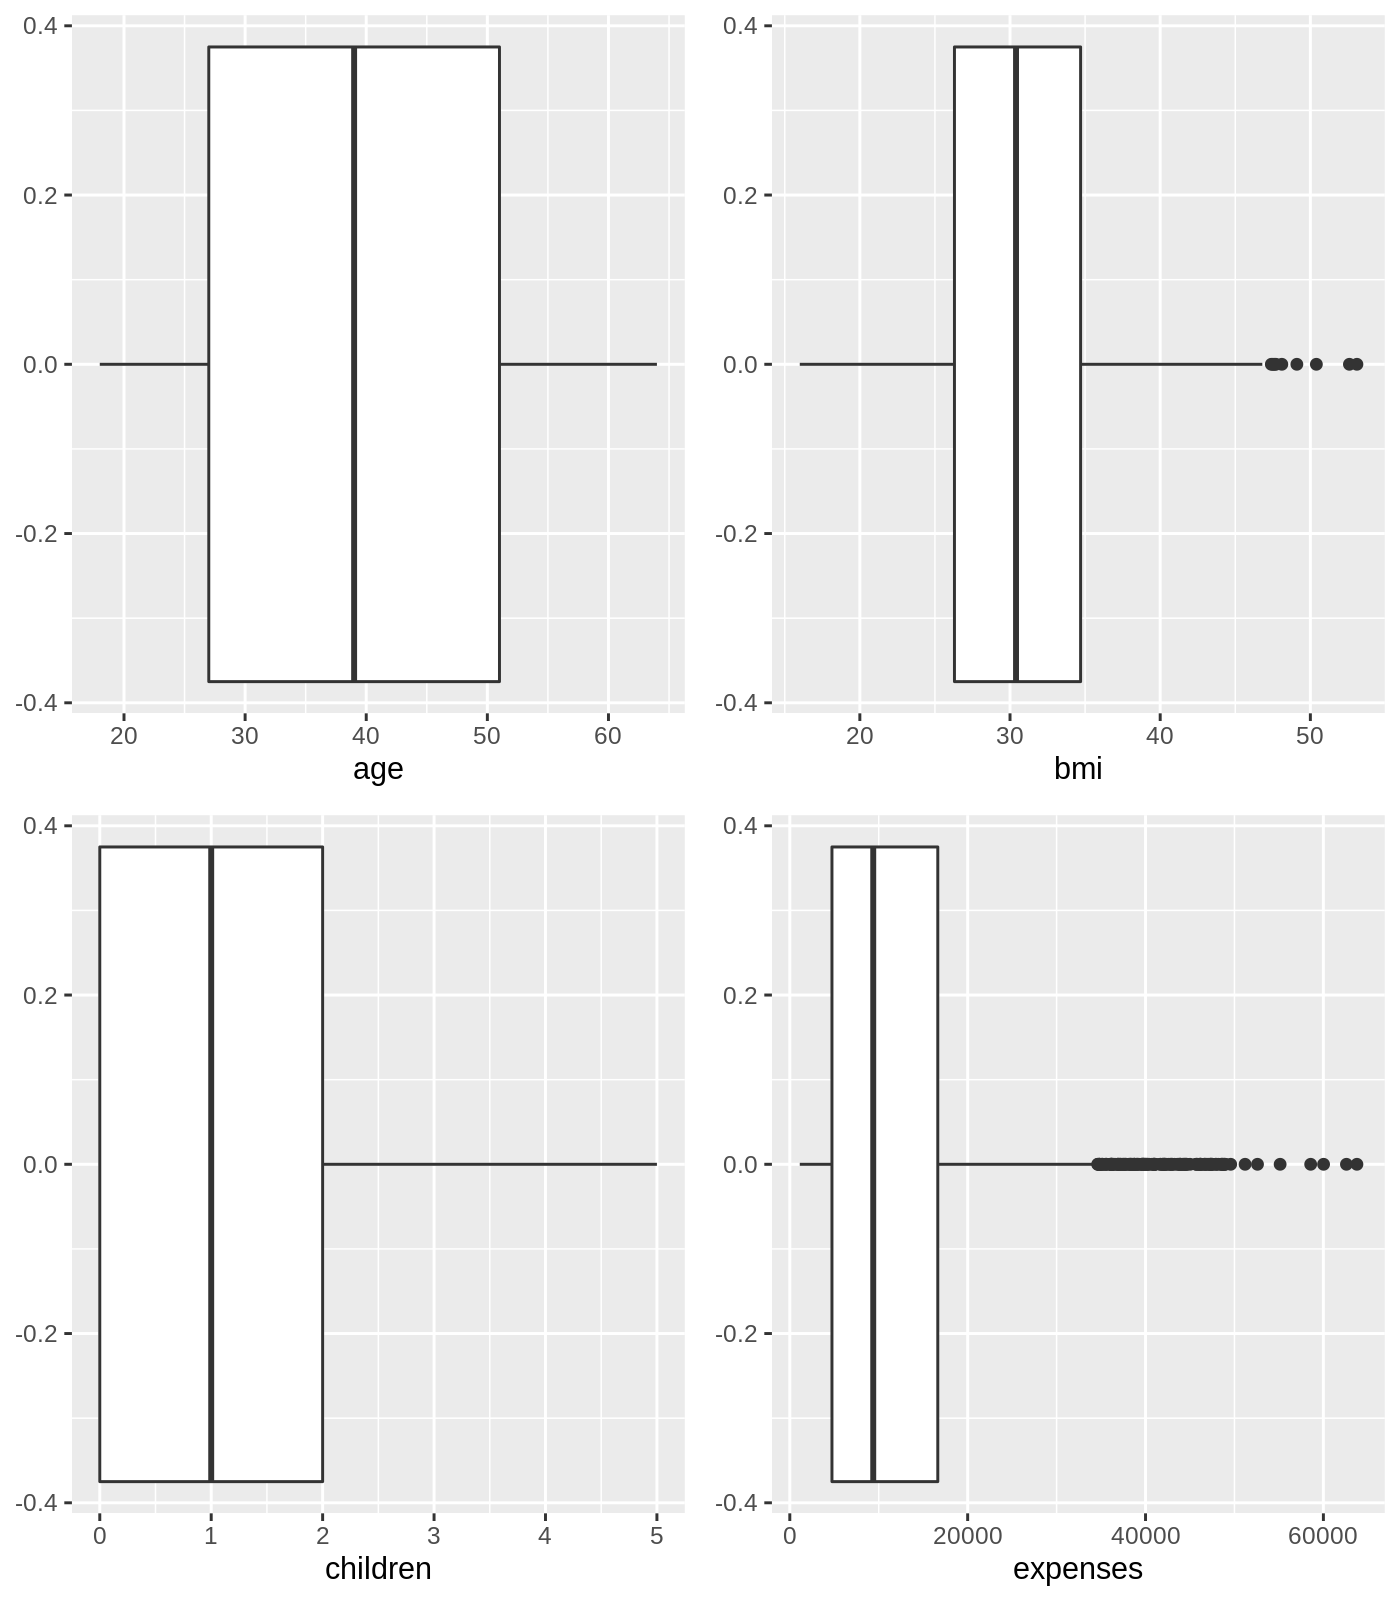

In [38]:
options(repr.plot.height=8, repr.plot.res=200)

#BOXPLOT FOR AGE
plot1 = ggplot( data = insurance_dataset, aes(x = age)) + geom_boxplot()
#BOXPLOT FOR BMI
plot2 = ggplot( data = insurance_dataset, aes(x = bmi)) + geom_boxplot()
#BOXPLOT FOR CHILDREN
plot3 = ggplot( data = insurance_dataset, aes(x = children)) + geom_boxplot()
#BOXPLOT FOR EXPENSES
plot4 = ggplot( data = insurance_dataset, aes(x = expenses)) + geom_boxplot()

grid.arrange(plot1, plot2, plot3,plot4, ncol =2)

### SCATTERPLOT

The following objects are masked from insurance_dataset (pos = 5):

    age, bmi, children, expenses, region, sex, smoker


The following objects are masked from insurance_dataset (pos = 8):

    age, bmi, children, expenses, region, sex, smoker




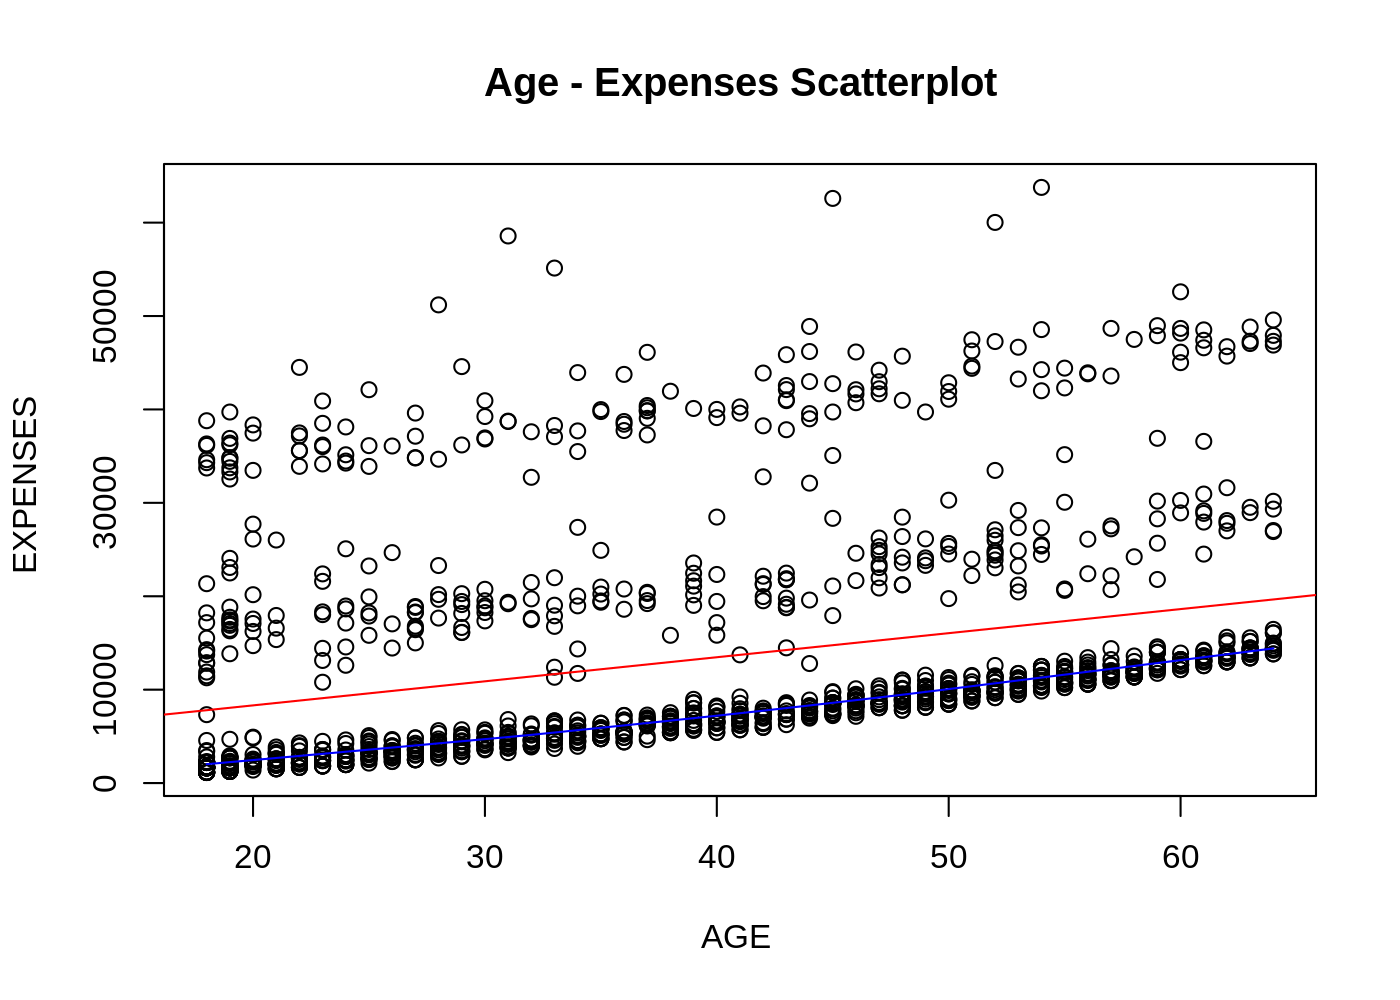

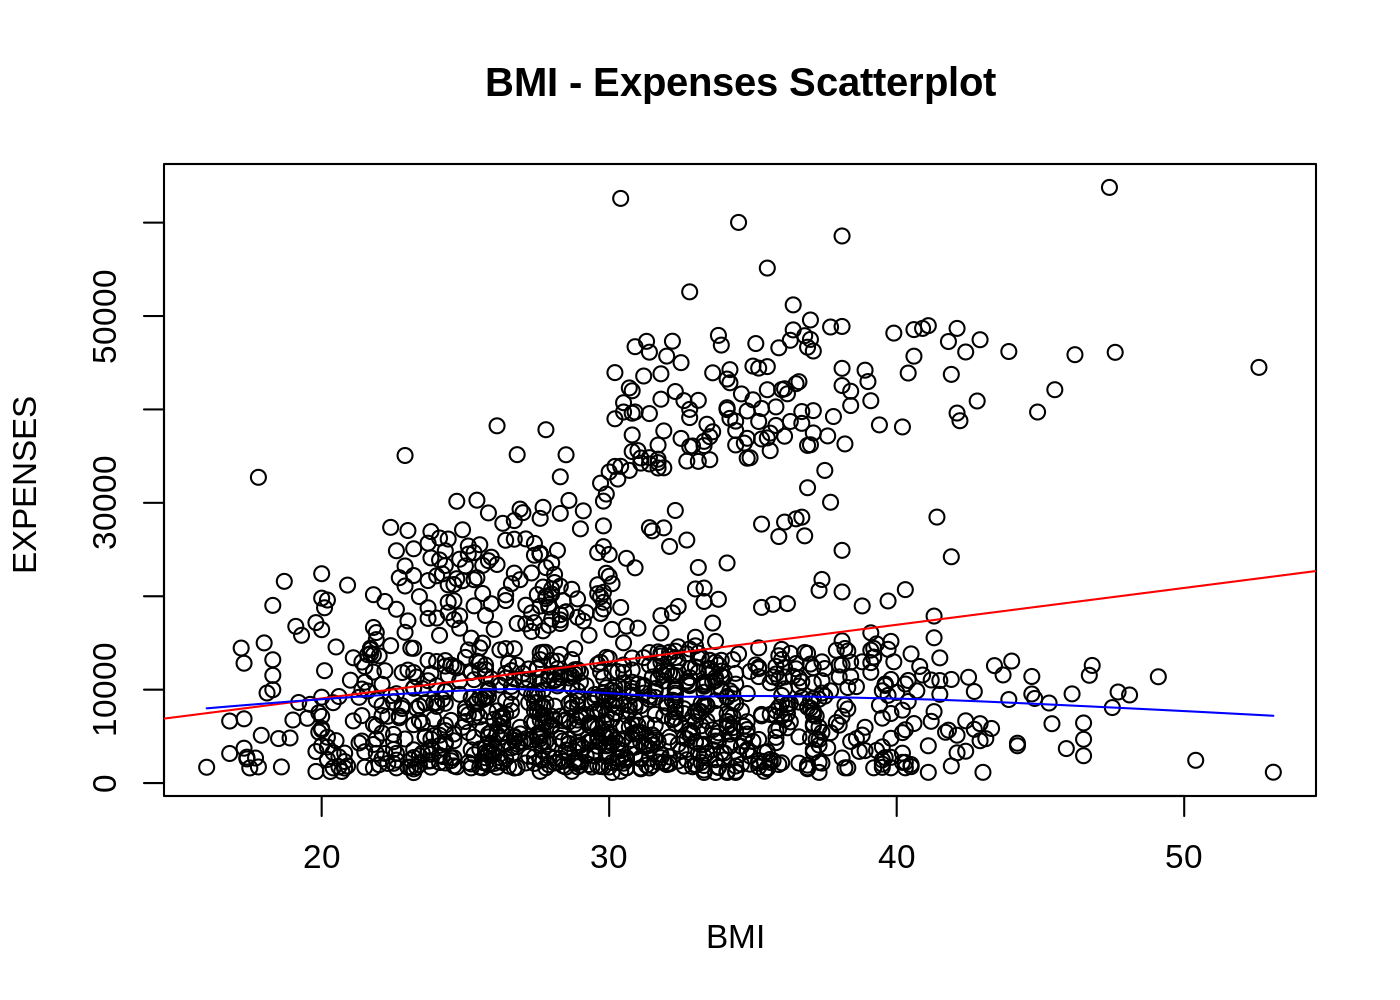

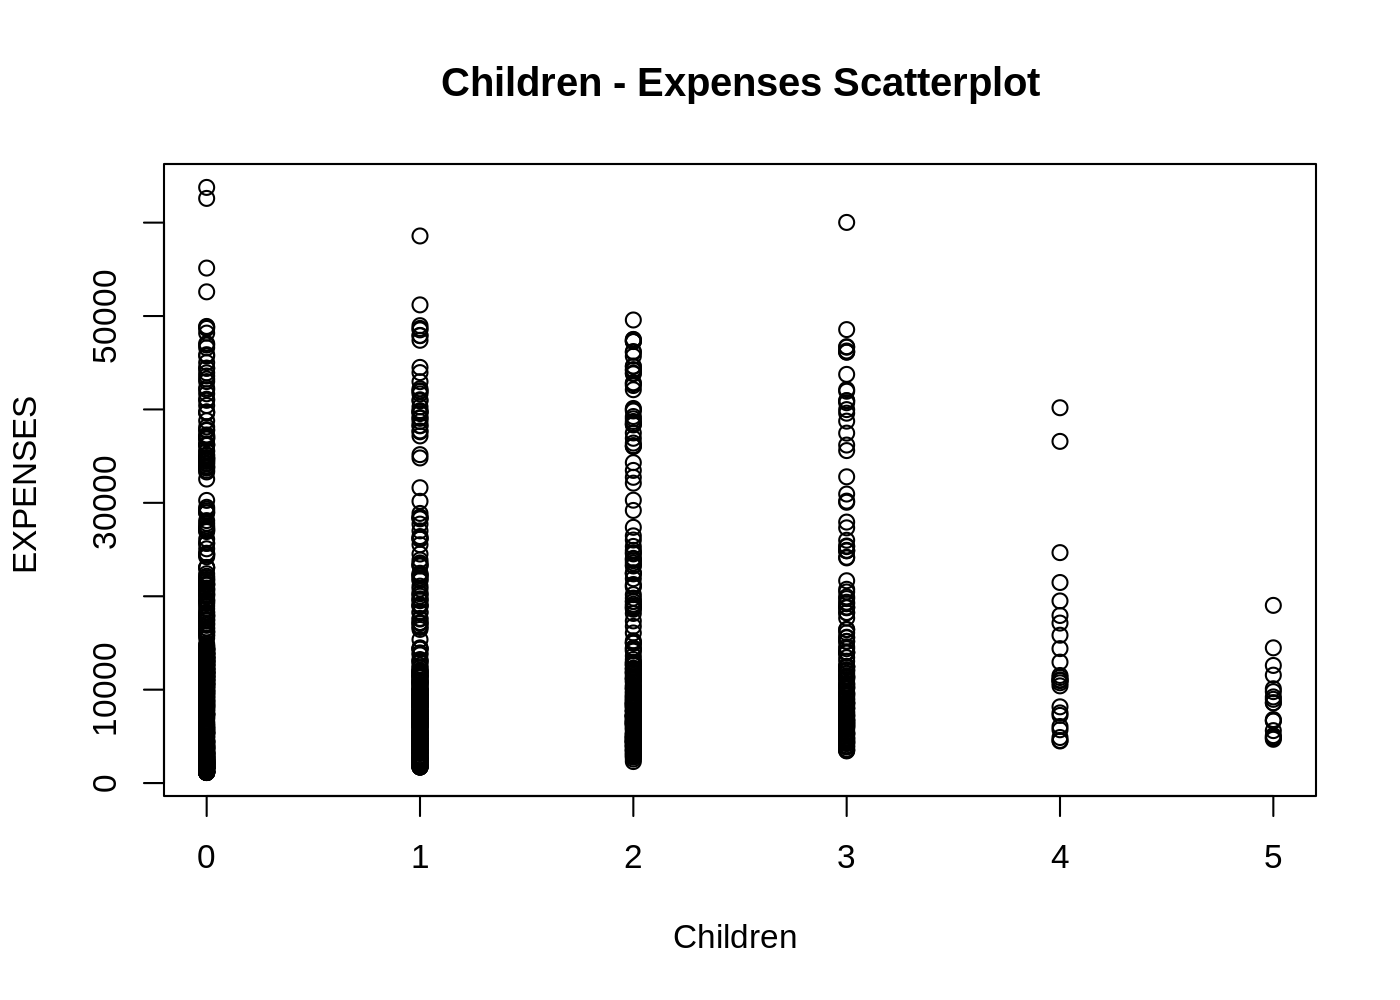

In [39]:
#scatterplots

options(repr.plot.height=5, repr.plot.res=200)

attach(insurance_dataset)

plot1 = plot(age, expenses, main="Age - Expenses Scatterplot",
xlab="AGE ", ylab="EXPENSES ", pch= 1)
abline(lm(expenses~age), col="red") # regression line (y~x)
lines(lowess(age,expenses), col="blue") # lowess line (x,y)

plot2 = plot(bmi, expenses, main="BMI - Expenses Scatterplot",
xlab="BMI ", ylab="EXPENSES ", pch= 1)
abline(lm(expenses~bmi), col="red") # regression line (y~x)
lines(lowess(bmi,expenses), col="blue") # lowess line (x,y)

plot3 = plot(children, expenses, main="Children - Expenses Scatterplot",
xlab="Children ", ylab="EXPENSES ", pch= 1)



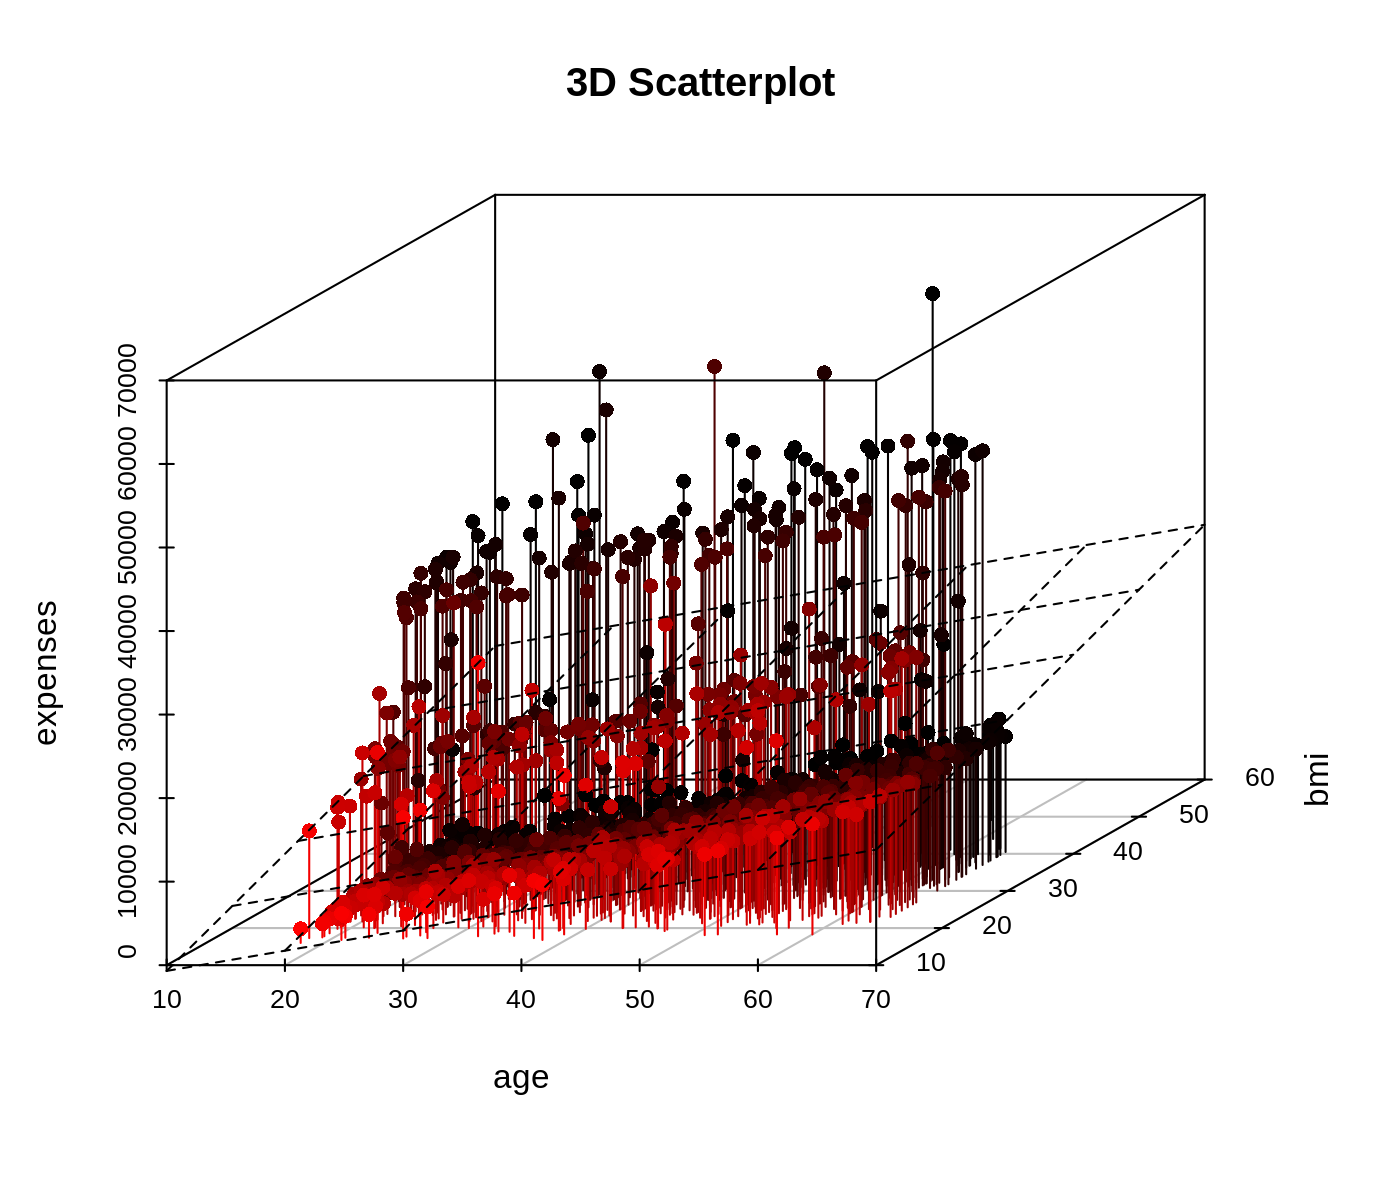

In [40]:
#3D Scatterplot for AGE-BMI-Expenses
library(scatterplot3d)

options(repr.plot.height=6, repr.plot.res=200)

s3d <-scatterplot3d(age,bmi,expenses, pch=16, highlight.3d=TRUE,
  type="h", main="3D Scatterplot")
fit <- lm(expenses ~ age+bmi)
s3d$plane3d(fit)

In [41]:
#Spinning 3D Scatterplot for AGE-BMI-Expenses
library(rgl)

plot3d(age, bmi, expenses, col="red", size=3)

#to display in rmd document
rglwidget()
#save the file
htmlwidgets::saveWidget(rglwidget(width= 800, height = 800),
                        file= "3D-ScatterPlot-Age-Bmi-Expenses.html",
                        libdir= "libs",
                        selfcontained = FALSE)
                        

HTML widgets cannot be represented in plain text (need html)

### One-Hot Encoding

In [ ]:
dummy <- dummyVars(" ~ .", data=insurance_dataset)
new_df <- data.frame(predict(dummy, newdata = insurance_dataset)) 

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
head(new_df)

,age,sexfemale,sexmale,bmi,children,smokerno,smokeryes,regionnortheast,regionnorthwest,regionsoutheast,regionsouthwest,expenses
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,1,0,27.9,0,0,1,0,0,0,1,16884.92
2,18,0,1,33.8,1,1,0,0,0,1,0,1725.55
3,28,0,1,33.0,3,1,0,0,0,1,0,4449.46
4,33,0,1,22.7,0,1,0,0,1,0,0,21984.47
5,32,0,1,28.9,0,1,0,0,1,0,0,3866.86
6,31,1,0,25.7,0,1,0,0,0,1,0,3756.62


### PRINCIPAL COMPONENT ANALYSIS

In [ ]:
all_new_df = new_df[,c(-12)]

In [ ]:
res.pca <- prcomp(all_new_df, retx=TRUE,center = FALSE, scale = TRUE)
summary(res.pca)
res.pca$x

Importance of components:
                          PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     2.3203 1.0565 1.00075 1.00012 0.9922 0.95018 0.70268
Proportion of Variance 0.4894 0.1015 0.09104 0.09093 0.0895 0.08208 0.04489
Cumulative Proportion  0.4894 0.5909 0.68194 0.77287 0.8624 0.94444 0.98933
                           PC8     PC9      PC10      PC11
Standard deviation     0.30185 0.16198 2.131e-15 8.977e-16
Proportion of Variance 0.00828 0.00239 0.000e+00 0.000e+00
Cumulative Proportion  0.99761 1.00000 1.000e+00 1.000e+00

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
1,-1.847851,0.39297463,1.07493391,-0.9082859,0.31632126,-2.38549561,-0.688555259,-0.44351447,-0.076288612,-4.718448e-15,-1.110223e-15
2,-2.120970,0.97890051,0.45636057,0.3435169,0.49931443,1.54493073,0.003806405,-0.46863003,-0.010479808,-4.107825e-15,1.332268e-15
3,-2.603340,0.96517190,0.48089515,0.3591228,0.43125276,1.50768439,1.131559943,-0.23565520,-0.023883448,-2.997602e-15,1.110223e-15
4,-1.914380,-0.30637224,-0.04994242,1.3981911,-1.39056228,0.50936715,-0.735667737,-0.10896133,-0.200061733,-1.887379e-15,2.220446e-16
5,-1.988317,-0.30118158,-0.04632790,1.3985105,-1.38390106,0.51438507,-0.760649208,-0.17511054,-0.028906299,-1.887379e-15,1.110223e-16
6,-1.940681,-0.07207312,0.17733641,0.4176019,1.87813964,0.55652763,-0.540323963,-0.15215206,-0.220457340,-3.330669e-15,1.110223e-15
7,-2.390348,-0.07600518,0.19139417,0.4243972,1.85362992,0.54419074,-0.049457474,0.12177836,-0.001430348,-1.332268e-15,5.551115e-16
8,-2.610614,-1.36343079,-0.26442266,1.5076012,-0.13399475,-0.54099681,1.011565944,-0.05772091,-0.036041503,-1.887379e-15,-2.220446e-16
9,-2.439717,0.16872164,-1.34164132,-0.9761059,-0.86509399,0.91234253,0.496800724,-0.06410890,0.004704336,-6.106227e-16,-6.661338e-16
10,-2.221188,-1.35819946,-0.31275544,1.4793066,-0.03251796,-0.48852977,-0.801479028,0.43471201,-0.094474021,7.771561e-16,-6.661338e-16


We notice that PC1 till PC6 add significance to our data

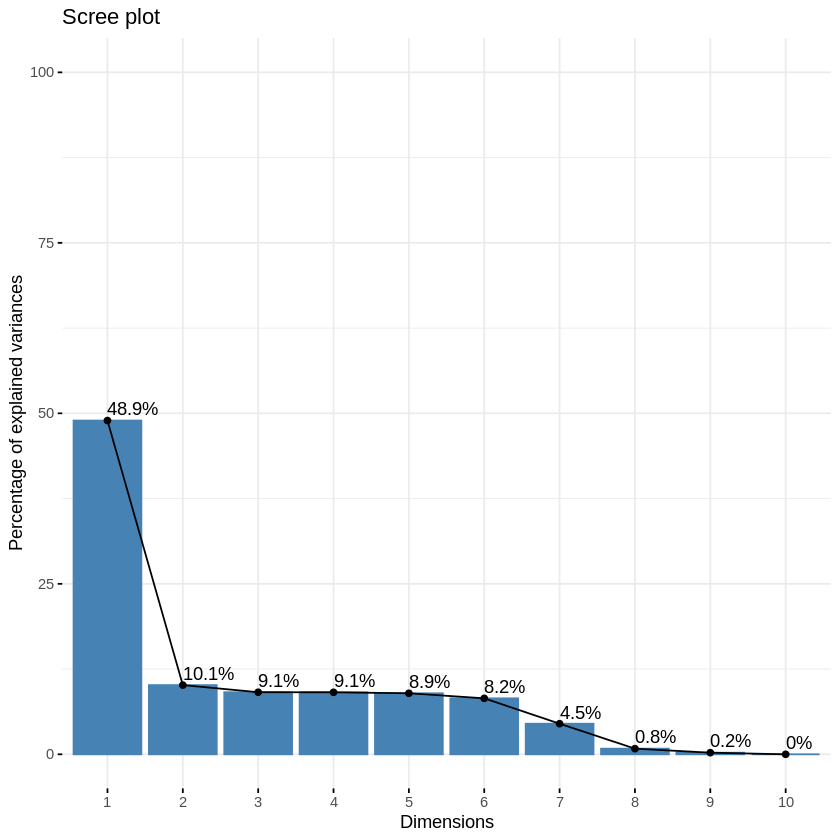

In [ ]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0,100))

### MODELLING with PCA

In [ ]:
pca_model <- as.data.frame(cbind(new_df$expenses,res.pca$x))

In [ ]:
head(pca_model)

,V1,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16884.92,-1.847851,0.39297463,1.07493391,-0.9082859,0.3163213,-2.3854956,-0.688555259,-0.4435145,-0.07628861,-4.718448e-15,-1.110223e-15
2,1725.55,-2.120970,0.97890051,0.45636057,0.3435169,0.4993144,1.5449307,0.003806405,-0.4686300,-0.01047981,-4.107825e-15,1.332268e-15
3,4449.46,-2.603340,0.96517190,0.48089515,0.3591228,0.4312528,1.5076844,1.131559943,-0.2356552,-0.02388345,-2.997602e-15,1.110223e-15
4,21984.47,-1.914380,-0.30637224,-0.04994242,1.3981911,-1.3905623,0.5093671,-0.735667737,-0.1089613,-0.20006173,-1.887379e-15,2.220446e-16
5,3866.86,-1.988317,-0.30118158,-0.04632790,1.3985105,-1.3839011,0.5143851,-0.760649208,-0.1751105,-0.02890630,-1.887379e-15,1.110223e-16
6,3756.62,-1.940681,-0.07207312,0.17733641,0.4176019,1.8781396,0.5565276,-0.540323963,-0.1521521,-0.22045734,-3.330669e-15,1.110223e-15


In [ ]:
new_model <- lm(V1~PC1+PC2+PC3+PC4+PC5+PC6,data=pca_model)

In [ ]:
summary(new_model)


Call:
lm(formula = V1 ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6, data = pca_model)

Residuals:
   Min     1Q Median     3Q    Max 
-19010  -3557  -1394   3513  32191 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9915.61    1467.35  -6.757 2.09e-11 ***
PC1         -10080.67     632.60 -15.935  < 2e-16 ***
PC2           6469.81     177.59  36.432  < 2e-16 ***
PC3           -674.74     188.09  -3.587 0.000346 ***
PC4             84.12     187.59   0.448 0.653909    
PC5            -70.76     189.04  -0.374 0.708237    
PC6          -6944.57     197.42 -35.176  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6858 on 1331 degrees of freedom
Multiple R-squared:  0.6807,	Adjusted R-squared:  0.6793 
F-statistic: 472.9 on 6 and 1331 DF,  p-value: < 2.2e-16


We can find that it gives us approx. 67% accuracy.

### MODELLING WITH PARTITON

#### Backward and forward substitution & Stepwise Regression

In [ ]:
new_new_df= read.csv("insurance_num.csv")

In [ ]:
## backward elimination
BER= regsubsets(expenses~., data=new_new_df, method="backward")
Modelsummary=cbind(summary(BER)$which,R2=summary(BER)$rsq,SSres=summary(BER)$rss,AdjR2=summary(BER)$adjr2,Cp=summary(BER)$cp,BIC=summary(BER)$bic)
Modelsummary

,(Intercept),age,sex,bmi,children,smoker,region,R2,SSres,AdjR2,Cp,BIC
1,1,0,0,0,0,1,0,0.6197648,74554318169,0.6194802,697.874453,-1279.402
2,1,1,0,0,0,1,0,0.7214008,54626116505,0.7209834,156.758979,-1688.342
3,1,1,0,1,0,1,0,0.7474907,49510566850,0.7469228,19.341774,-1812.703
4,1,1,0,1,1,1,0,0.7497098,49075447086,0.7489588,9.483189,-1817.315
5,1,1,0,1,1,1,1,0.7508939,48843278584,0.7499588,5.155759,-1816.461
6,1,1,1,1,1,1,1,0.7509231,48837563422,0.7498003,7.000000,-1809.419


Stepwise Regression

In [ ]:
SWR=regsubsets(expenses~.,data=new_new_df,method="seqrep")
Modelsummary=cbind(summary(SWR)$which,R2=summary(SWR)$rsq,SSres=summary(SWR)$rss,AdjR2=summary(SWR)$adjr2,Cp=summary(SWR)$cp,BIC=summary(SWR)$bic)
Modelsummary

,(Intercept),age,sex,bmi,children,smoker,region,R2,SSres,AdjR2,Cp,BIC
1,1,0,0,0,0,1,0,0.61976481,74554318169,0.61948021,697.874453,-1279.4017
2,1,1,1,0,0,0,0,0.09344348,177752363921,0.09208534,3512.393942,-109.6636
3,1,1,0,1,0,1,0,0.74749069,49510566850,0.74692283,19.341774,-1812.7032
4,1,1,0,1,1,1,0,0.74970985,49075447086,0.74895879,9.483189,-1817.3152
5,1,1,0,1,1,1,1,0.75089393,48843278584,0.74995885,5.155759,-1816.4612
6,1,1,1,1,1,1,1,0.75092308,48837563422,0.74980027,7.000000,-1809.4188


In [ ]:
## forward substituition
FSR=regsubsets(expenses~.,data=new_new_df,method="forward")
summary(FSR)
Modelsummary=cbind(summary(FSR)$which,R2=summary(FSR)$rsq,SSres=summary(FSR)$rss,AdjR2=summary(FSR)$adjr2,Cp=summary(FSR)$cp,BIC=summary(FSR)$bic)
Modelsummary

Subset selection object
Call: regsubsets.formula(expenses ~ ., data = new_new_df, method = "forward")
6 Variables  (and intercept)
         Forced in Forced out
age          FALSE      FALSE
sex          FALSE      FALSE
bmi          FALSE      FALSE
children     FALSE      FALSE
smoker       FALSE      FALSE
region       FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: forward
         age sex bmi children smoker region
1  ( 1 ) " " " " " " " "      "*"    " "   
2  ( 1 ) "*" " " " " " "      "*"    " "   
3  ( 1 ) "*" " " "*" " "      "*"    " "   
4  ( 1 ) "*" " " "*" "*"      "*"    " "   
5  ( 1 ) "*" " " "*" "*"      "*"    "*"   
6  ( 1 ) "*" "*" "*" "*"      "*"    "*"   

,(Intercept),age,sex,bmi,children,smoker,region,R2,SSres,AdjR2,Cp,BIC
1,1,0,0,0,0,1,0,0.6197648,74554318169,0.6194802,697.874453,-1279.402
2,1,1,0,0,0,1,0,0.7214008,54626116505,0.7209834,156.758979,-1688.342
3,1,1,0,1,0,1,0,0.7474907,49510566850,0.7469228,19.341774,-1812.703
4,1,1,0,1,1,1,0,0.7497098,49075447086,0.7489588,9.483189,-1817.315
5,1,1,0,1,1,1,1,0.7508939,48843278584,0.7499588,5.155759,-1816.461
6,1,1,1,1,1,1,1,0.7509231,48837563422,0.7498003,7.000000,-1809.419


From all of them, we notice that all features contribute to the final result

In [ ]:
new_new_df = read.csv("insurance_num.csv")

In [ ]:
set.seed(998)
trainPartitionRows <- createDataPartition(new_new_df$expenses, p = .80, list = FALSE)


In [ ]:
nrow(new_new_df)
nrow(trainPartitionRows)
head(trainPartitionRows)

[1] 1338

[1] 1072

Resample1
1
2
3
4
5
6


In [ ]:
trainDataset <- new_new_df[ trainPartitionRows,]
testDataset  <- new_new_df[-trainPartitionRows,]
head(trainDataset)
head(testDataset)

,age,sex,bmi,children,smoker,region,expenses
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,1,27.9,0,1,4,16884.92
2,18,0,33.8,1,0,4,1725.55
3,28,0,33.0,3,0,4,4449.46
4,33,0,22.7,0,0,2,21984.47
5,32,0,28.9,0,0,2,3866.86
6,31,1,25.7,0,0,4,3756.62


,age,sex,bmi,children,smoker,region,expenses
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,59,1,27.7,3,0,4,14001.13
35,28,0,36.4,1,1,4,51194.56
36,19,0,20.4,0,0,2,1625.43
43,41,0,21.8,1,0,4,6272.48
57,58,1,31.8,2,0,1,13607.37
60,34,1,37.3,2,0,2,5989.52


Training Model and also checking summmary

In [ ]:
fitControl <- trainControl(## 10-fold CV
                          method = "cv", # repeatedcv
                          number = 10
                          ## repeated ten times
                          #repeats = 10,
                          )

Model_2 <- train(expenses ~ .,
                    data = trainDataset,
                    method = "lm",
                    trControl = fitControl,
                    ## This last option is actually one
                    ## for gbm() that passes through
                    #verbose = TRUE
                    )

Model_2
summary(Model_2)

Linear Regression 

1072 samples
   6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 966, 964, 964, 965, 965, 964, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5995.567  0.7463421  4165.442

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11050.4  -2854.6   -981.9   1385.0  30183.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12285.56    1085.17 -11.321  < 2e-16 ***
age            263.35      13.09  20.126  < 2e-16 ***
sex            103.24     366.28   0.282  0.77811    
bmi            332.85      31.30  10.633  < 2e-16 ***
children       486.85     151.42   3.215  0.00134 ** 
smoker       23439.99     454.70  51.551  < 2e-16 ***
region        -178.69     145.84  -1.225  0.22075    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5981 on 1065 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7495 
F-statistic:   535 on 6 and 1065 DF,  p-value: < 2.2e-16


We see that we have 75% accuracy with this model

In [ ]:
saveRDS(Model_2, file = "insurance_model.rds")

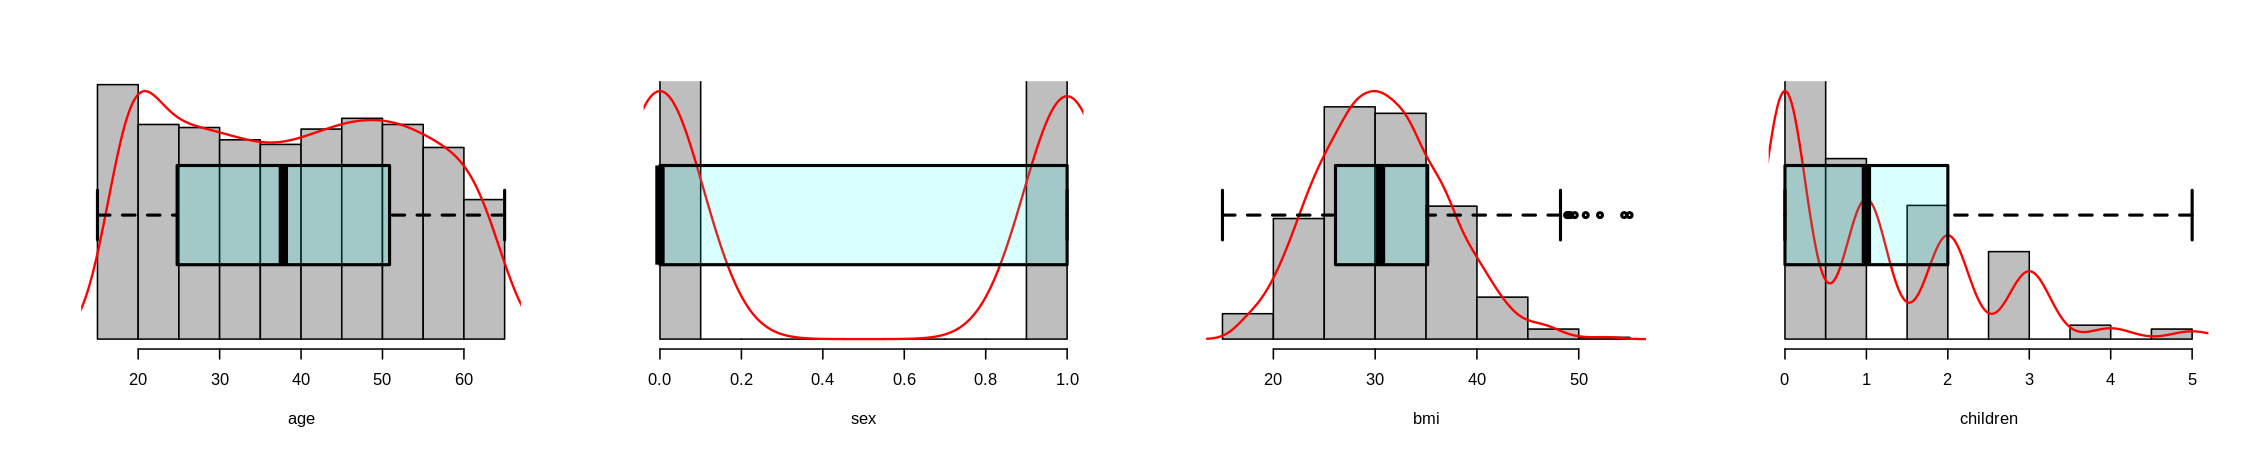

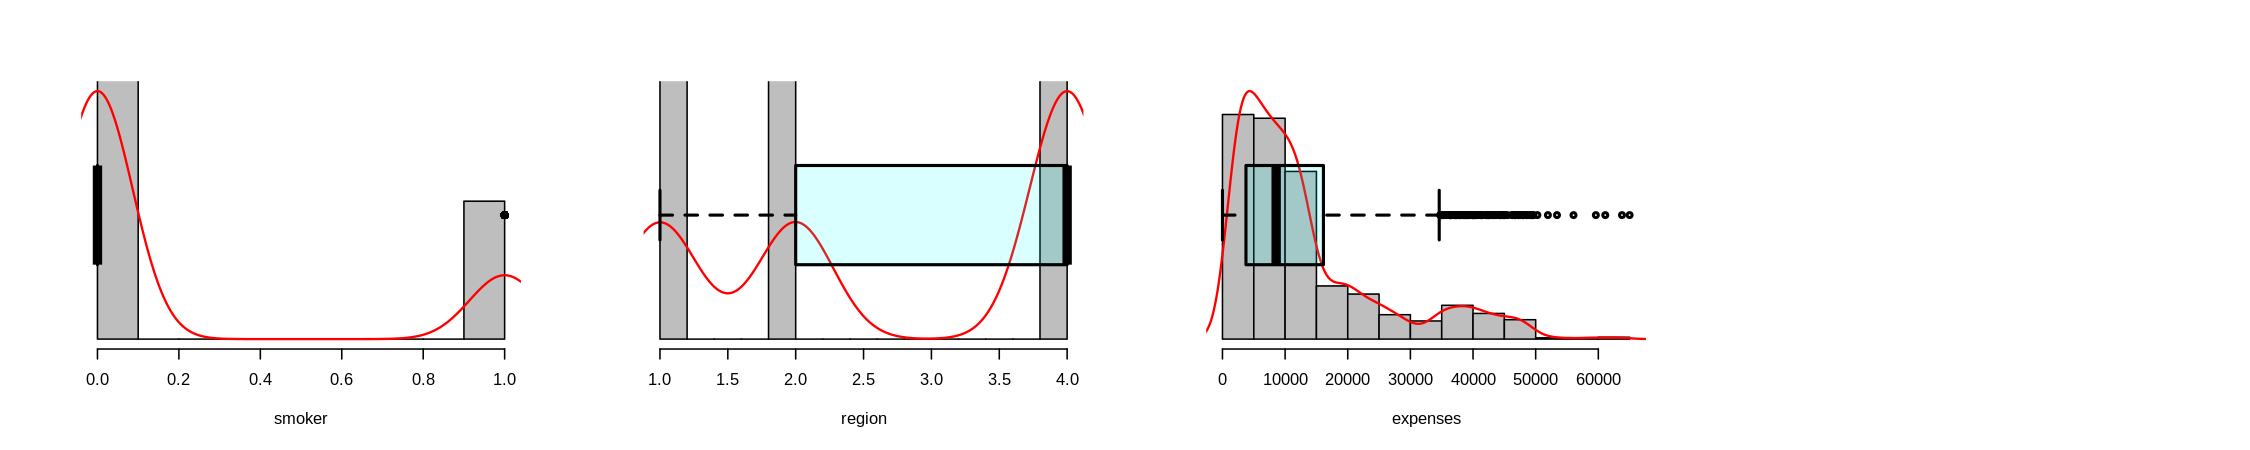

In [ ]:
par(mfrow=c(1,4))
options(repr.plot.height=3,repr.plot.width=15, repr.plot.res=150)
powerPlot <- function(x, name) {

dens <- density(x)
# Histogram
hist(x, probability = TRUE, xlab = name, ylab="", ylim= c(0, max(dens$y)), col = "grey",
     axes = FALSE, main = "")

# Axis
axis(1)

# Density
lines(dens, col = "red", lwd = 1.5)

# Add boxplot
par(new = TRUE)
boxplot(x, horizontal = TRUE, axes = FALSE,
        lwd = 2, col = rgb(0, 1, 1, alpha = 0.15), outlier.colour="red")
}


# a loop to run powerPlot() for all of the features
for (x in names(new_new_df)){
    powerPlot(new_new_df[[x]], x)
}